In [16]:
library(ggfortify)  # autoplot
library(dplyr)      # select
library(ggplot2)    # ggplot
library(gridExtra)  # grid
library(olsrr)      # hadi

In [95]:
# Data Load
setwd('D:/Working/03.Korea/회귀분석/Final-Report/google-play-store-apps')
gplay_data <- read.csv(file="googleplaystore.csv", header=TRUE, sep=",")

In [96]:
gplay_data <- subset(gplay_data, Category == "GAME")     # Category 항목을 GAME 데이터만 사용 
gplay_data <- subset(gplay_data, Type == "Paid")         # Type 항목을 Free 데이터만 사용
gplay_data <- subset(gplay_data, Last_Updated == "2017") # 업데이트 2017 년도의 데이터만 사용
rownames(gplay_data) <- 1:nrow(gplay_data)               # index 초기화.
gplay_data <- gplay_data %>% dplyr::select(-Category, -Type, -Last_Updated)  # 결정 된 항목의 열을 삭제

In [97]:
# 전체 적합
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7627 -0.1443 -0.0406  0.1899  0.7332 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.512e+00  2.723e-01  16.567 1.36e-10 ***
Reviews      1.194e-04  8.715e-05   1.370   0.1924    
Size        -1.341e-02  6.974e-03  -1.923   0.0751 .  
Installs    -6.110e-06  8.712e-06  -0.701   0.4946    
Price        1.551e-02  3.349e-02   0.463   0.6504    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.415 on 14 degrees of freedom
Multiple R-squared:  0.355,	Adjusted R-squared:  0.1707 
F-statistic: 1.927 on 4 and 14 DF,  p-value: 0.1618


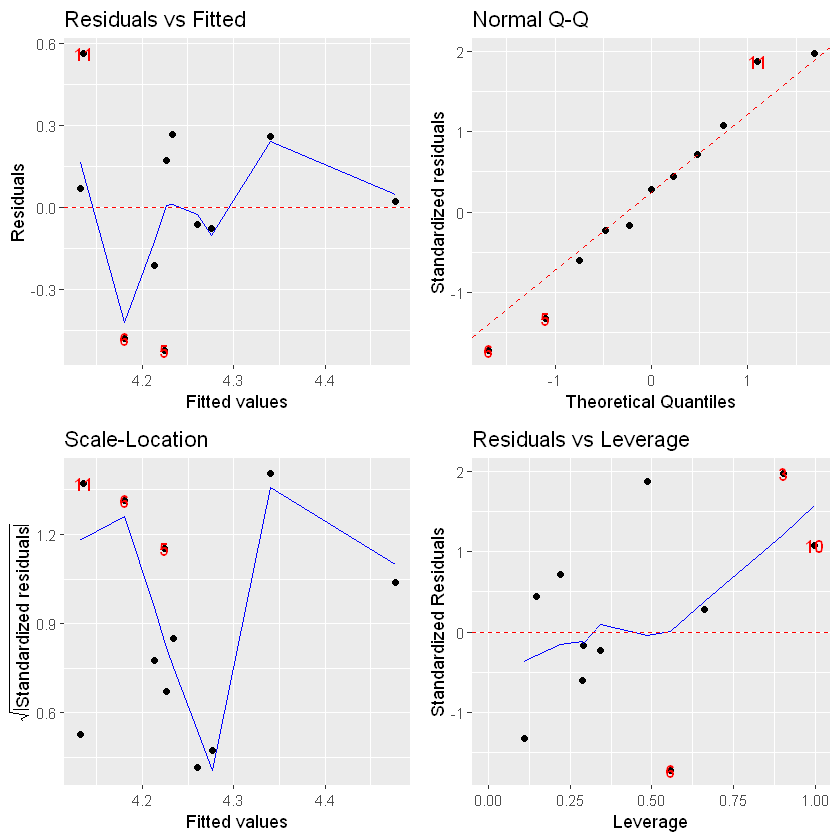

In [91]:
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.305566 -0.061357 -0.001706  0.080365  0.252019 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.199e+00  1.460e-01  28.758   <2e-16 ***
Reviews      2.328e-06  2.729e-06   0.853    0.405    
Size         1.706e-03  1.342e-03   1.271    0.220    
Installs    -6.613e-08  1.087e-07  -0.608    0.551    
Price        3.909e-02  2.366e-02   1.652    0.116    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1516 on 18 degrees of freedom
Multiple R-squared:  0.1665,	Adjusted R-squared:  -0.01872 
F-statistic: 0.8989 on 4 and 18 DF,  p-value: 0.4851


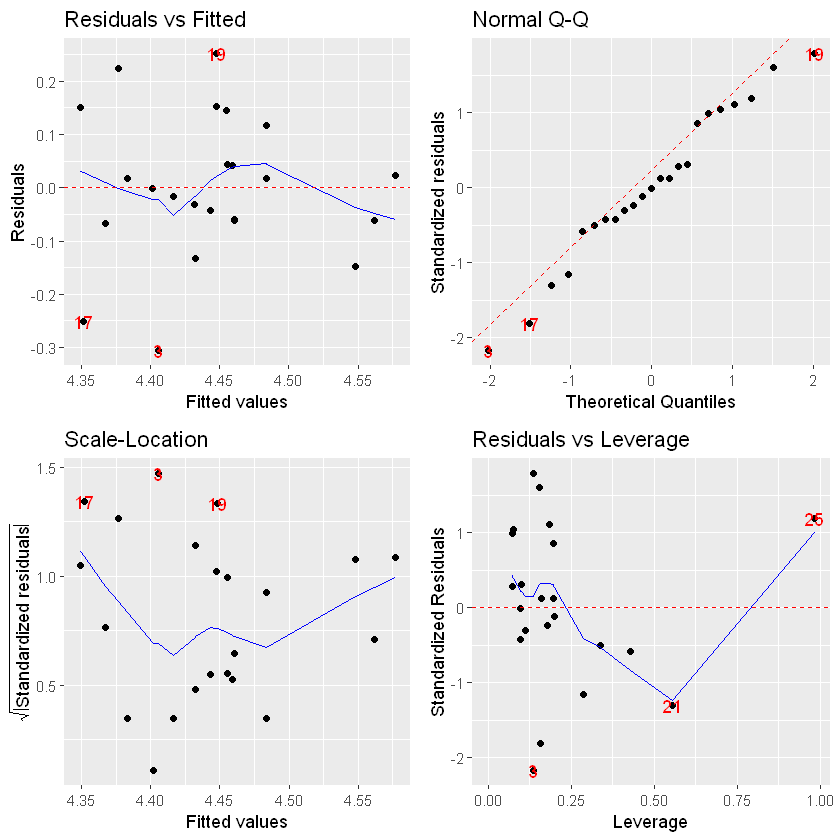

In [87]:
gplay_data <- gplay_data[c(-11,-13,-26),]    # 13, 14, 19 데이터 제거
# 전체 적합
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")

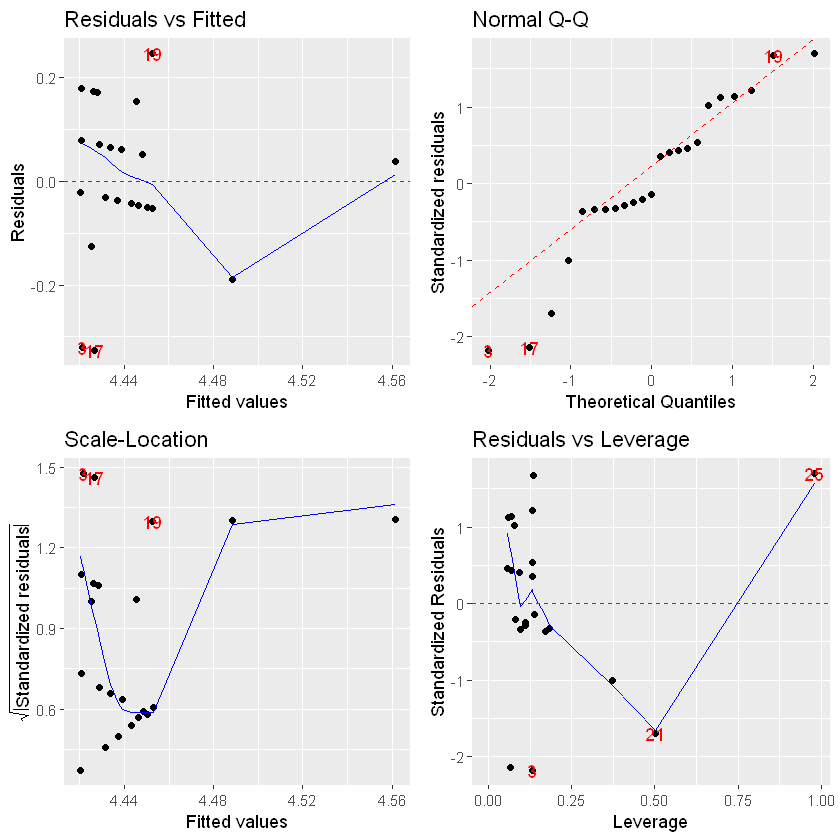

In [82]:
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")


Call:
lm(formula = log(Rating) ~ log(Reviews) + log(Size) + log(Installs), 
    data = gplay_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28576 -0.03962  0.02182  0.06464  0.17743 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.523145   0.041658  36.563  < 2e-16 ***
log(Reviews)   0.034644   0.007153   4.844 3.44e-06 ***
log(Size)      0.012387   0.008977   1.380     0.17    
log(Installs) -0.034974   0.006845  -5.109 1.08e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08835 on 135 degrees of freedom
Multiple R-squared:  0.172,	Adjusted R-squared:  0.1536 
F-statistic: 9.348 on 3 and 135 DF,  p-value: 1.171e-05


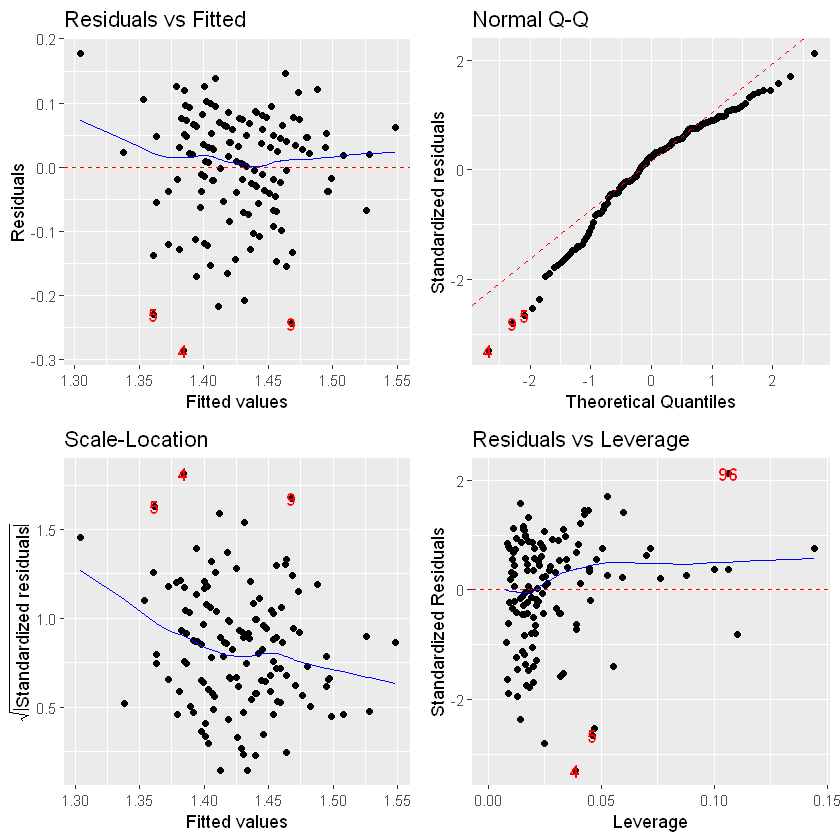

In [72]:
# 전체 적합
gplay_reg = lm(log(Rating) ~ log(Reviews) + log(Size) + log(Installs), gplay_data)
summary(gplay_reg)
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")

In [73]:
rownames(gplay_data) <- 1:nrow(gplay_data)
gplay_data <- gplay_data[c(-4,-5,-9),]    # 13, 14, 19 데이터 제거
# 전체 적합
gplay_reg = lm(log(Rating) ~ log(Reviews) + log(Size) + log(Installs), gplay_data)
summary(gplay_reg)
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")

[1] 136


Call:
lm(formula = log(Rating) ~ log(Reviews) + log(Size) + log(Installs), 
    data = gplay_data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.251491 -0.036084  0.009692  0.056740  0.130466 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.5569366  0.0372452  41.802  < 2e-16 ***
log(Reviews)   0.0276223  0.0064583   4.277 3.66e-05 ***
log(Size)      0.0001211  0.0082626   0.015    0.988    
log(Installs) -0.0286728  0.0061608  -4.654 7.96e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07788 on 129 degrees of freedom
Multiple R-squared:  0.1452,	Adjusted R-squared:  0.1253 
F-statistic: 7.302 on 3 and 129 DF,  p-value: 0.0001464


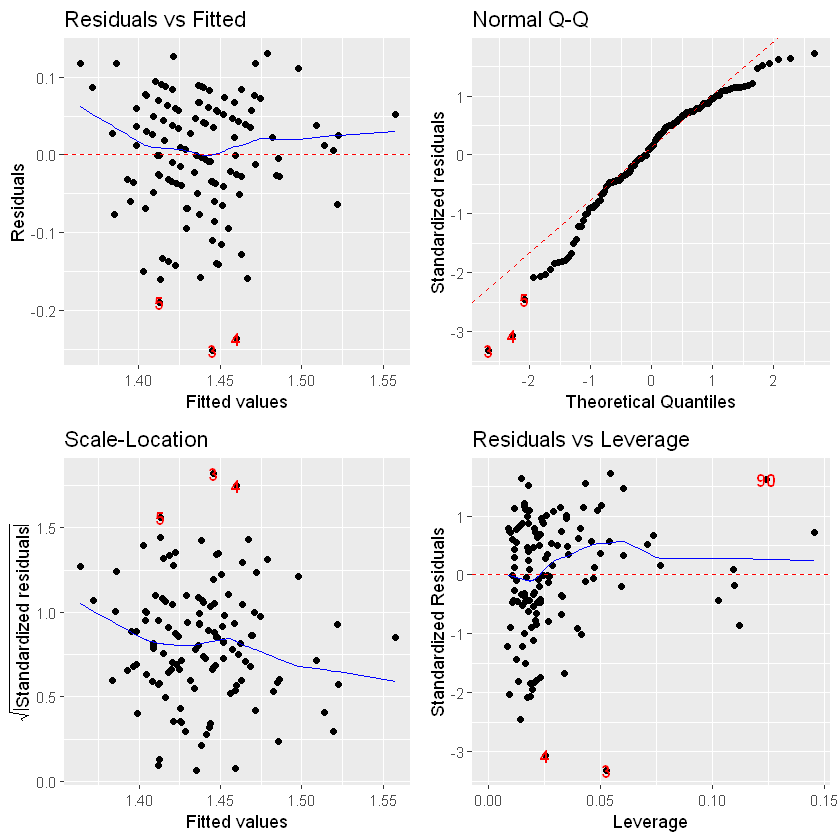

In [75]:
rownames(gplay_data) <- 1:nrow(gplay_data)
gplay_data <- gplay_data[c(-1,-2,-6),]    # 13, 14, 19 데이터 제거
# 전체 적합
gplay_reg = lm(log(Rating) ~ log(Reviews) + log(Size) + log(Installs), gplay_data)
summary(gplay_reg)
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")


Call:
lm(formula = log(Rating) ~ log(Reviews) + log(Size) + log(Installs), 
    data = gplay_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25538 -0.03898  0.01091  0.05396  0.12926 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.5500660  0.0355808  43.565  < 2e-16 ***
log(Reviews)   0.0241281  0.0062252   3.876  0.00017 ***
log(Size)     -0.0001008  0.0079053  -0.013  0.98985    
log(Installs) -0.0253115  0.0059384  -4.262 3.93e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07425 on 126 degrees of freedom
Multiple R-squared:  0.1281,	Adjusted R-squared:  0.1074 
F-statistic: 6.173 on 3 and 126 DF,  p-value: 6e-04


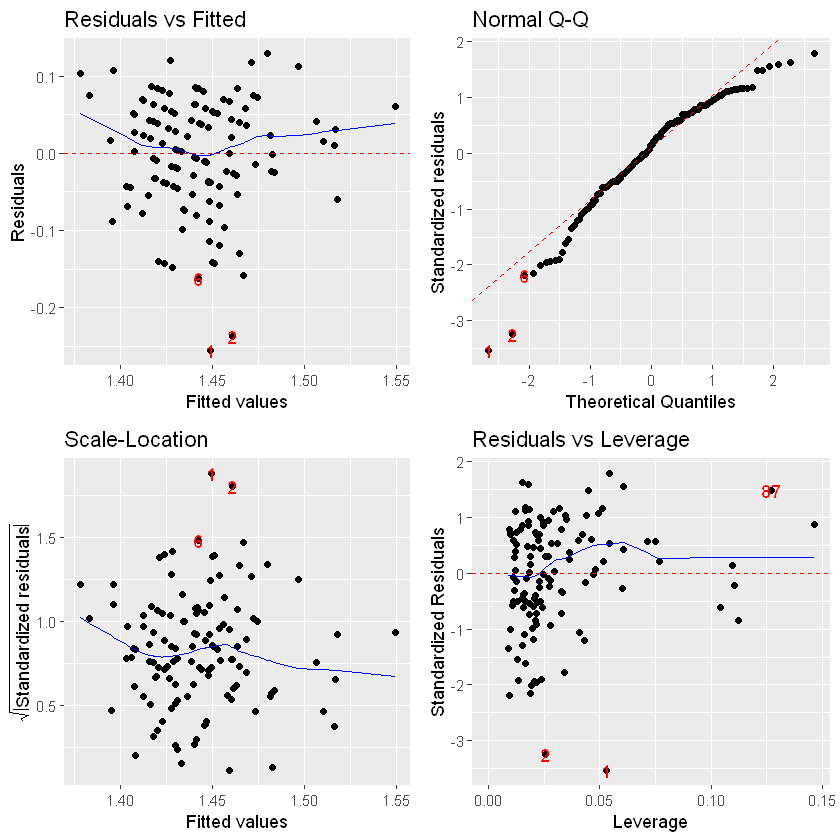

In [76]:
rownames(gplay_data) <- 1:nrow(gplay_data)
gplay_data <- gplay_data[c(-3,-4,-5),]    # 13, 14, 19 데이터 제거
# 전체 적합
gplay_reg = lm(log(Rating) ~ log(Reviews) + log(Size) + log(Installs), gplay_data)
summary(gplay_reg)
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")

In [57]:
# 전체 적합
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26841 -0.16927  0.02798  0.23084  0.73582 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.272e+00  5.577e-02  76.591   <2e-16 ***
Reviews      9.193e-08  8.014e-08   1.147    0.254    
Size        -4.745e-04  1.116e-03  -0.425    0.671    
Installs    -2.375e-11  3.242e-09  -0.007    0.994    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3285 on 120 degrees of freedom
Multiple R-squared:  0.03085,	Adjusted R-squared:  0.006619 
F-statistic: 1.273 on 3 and 120 DF,  p-value: 0.2867


In [315]:
# Data Load
setwd('D:/Working/03.Korea/회귀분석/Final-Report/google-play-store-apps')
gplay_data <- read.csv(file="googleplaystore.csv", header=TRUE, sep=",")

In [316]:
gplay_data <- subset(gplay_data, Category == "GAME")     # Category 항목을 GAME 데이터만 사용 
gplay_data <- subset(gplay_data, Type == "Paid")         # Type 항목을 Paid 데이터만 사용
gplay_data <- subset(gplay_data, Last_Updated == "2018") # 업데이트 2017 년도의 데이터만 사용
rownames(gplay_data) <- 1:nrow(gplay_data)               # index 초기화.
gplay_data <- gplay_data %>% dplyr::select(-Category, -Type, -Last_Updated)  # 결정 된 항목의 열을 삭제

In [317]:
# 전체 적합
gplay_reg = lm(Rating ~ ., gplay_data)
summary(gplay_reg)


Call:
lm(formula = Rating ~ ., data = gplay_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64066 -0.07990 -0.00738  0.12243  0.58906 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.384e+00  2.138e-01  20.507 2.27e-15 ***
Reviews      2.697e-06  4.371e-06   0.617    0.544    
Size         4.980e-04  2.098e-03   0.237    0.815    
Installs    -9.451e-08  1.761e-07  -0.537    0.597    
Price        8.283e-03  3.500e-02   0.237    0.815    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2569 on 21 degrees of freedom
Multiple R-squared:  0.02652,	Adjusted R-squared:  -0.1589 
F-statistic: 0.143 on 4 and 21 DF,  p-value: 0.9641


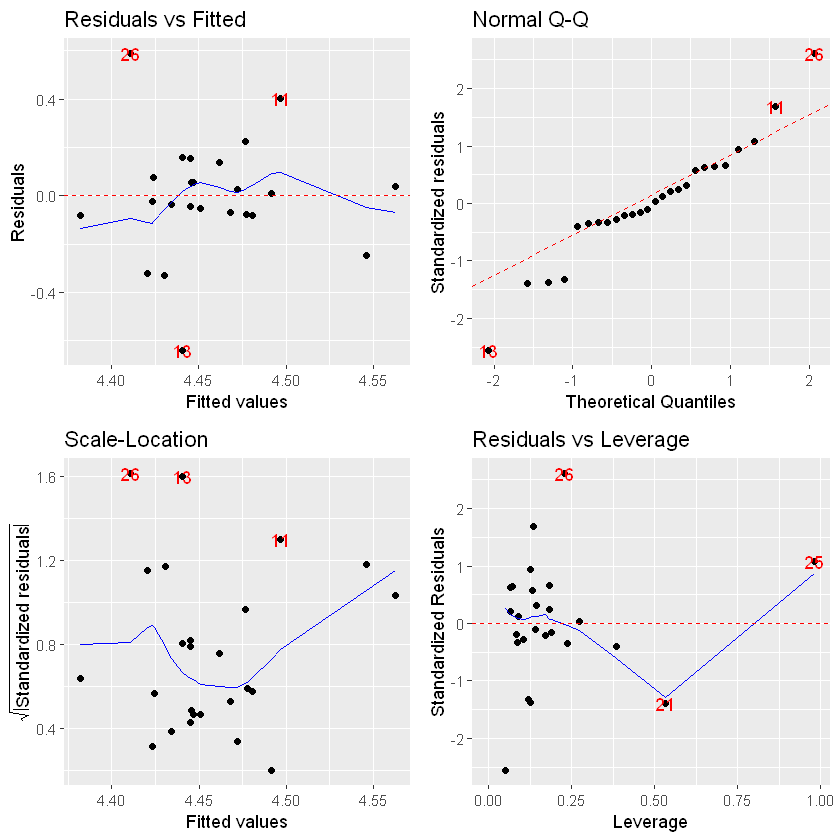

In [320]:
autoplot(gplay_reg
         , colour = "black"
         , label.colour ="red"
         , smooth.colour = "blue"
         , ad.colour = "red")